# RNN

### Stock Price Prediction Using Deep Learning Models

Introduction

Predicting stock prices is a complex yet potentially profitable endeavor for investors and traders. Thanks to the evolution of machine learning and deep learning technologies, we have more advanced methods to approach this challenge. In this notebook, we will concentrate on forecasting the closing stock prices of a publicly traded company using the last nine days of data. For this analysis, we will focus on Meta Platforms, Inc. (formerly known as Facebook), which is a leading entity in social media and technology sectors worldwide.
The goal of this project is to utilize different types of neural network architectures to predict the 10th-day closing price based on the closing prices of the previous nine days. The models we will explore include:

Recurrent Neural Networks (RNN): Known for their effectiveness in sequence prediction problems due to their internal memory.
Long Short-Term Memory (LSTM): A type of RNN capable of learning long-term dependencies, making it highly suitable for time series data like stock prices.
Gated Recurrent Units (GRU): Similar to LSTM with fewer parameters and often faster training times without significant loss of capability.
Convolutional Neural Networks (Conv1D): Typically used for image recognition tasks, but recently also applied in sequence prediction problems.

Each of these models has its strengths and weaknesses in processing time series data. Through this notebook, we will build these models using TensorFlow and Keras, train them on historical stock price data from Yahoo Finance, and evaluate their performance in predicting future stock prices.

The primary objective is not just to predict the stock prices but also to understand how different models behave and perform under the same dataset conditions. This analysis will provide insights into which model architecture is more effective for stock price prediction and under what circumstances.

Let's dive into the data gathering, preprocessing, and model building steps to see how each model performs on our stock price prediction task.

In [1]:
# import the required libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, SimpleRNN, GRU, Conv1D
from tensorflow.keras.callbacks import EarlyStopping
import time

In this code chunk, we begin by importing essential libraries and modules that will be used throughout the notebook for data handling, model building, and evaluation. **Pandas** and **NumPy** are imported for data manipulation and numerical operations, respectively, which are fundamental for preparing and processing the stock price data. **Matplotlib** is used for visualizing data and model results, allowing for a clear graphical representation of trends and performances. 

We then import **TensorFlow** and its high-level API **Keras**, which are crucial for designing and training various neural network architectures such as LSTM, GRU, SimpleRNN, and Conv1D. These models are suited for handling sequential data like stock prices. The **Sequential** model from Keras allows for the straightforward stacking of layers, and different types of layers are specifically imported to experiment with different network structures. The **EarlyStopping** callback is included to enhance training by stopping it at the right time to prevent overfitting. Lastly, the **train_test_split** function from Scikit-learn is utilized to divide the dataset into training and testing sets, ensuring that the model can be evaluated on unseen data. The **time** module is also imported to track the duration of model training processes, which helps in assessing the efficiency of different neural network configurations.

In [2]:
# random set seed 
np.random.seed(1)
tf.random.set_seed(1)

# while aimijng to get a good model or a good fit, setting the epoch number is a key step which will easily modify
#if we increasing the epoch it takes more time for training the data sample
epoch_num = 2000

In this code chunk, we set the stage for reproducibility and fine-tune the training process of our models. By setting random seeds for both NumPy and TensorFlow, we ensure that all random processes such as data shuffling and initial weight assignments in our neural networks are consistent across different runs. This reproducibility is crucial for debugging and for scientifically comparing the performance of models under the same conditions. Specifically, `np.random.seed(1)` and `tf.random.set_seed(1)` are used to set these seeds, which standardizes the randomness in the computations carried out by NumPy and TensorFlow, respectively.

Additionally, we configure a key hyperparameter for training: the number of epochs. The variable `epoch_num` is set to 20, defining how many complete passes the model will make over the entire training dataset. This number is critical because it directly influences the training duration and the model's ability to learn from the data. A higher number of epochs might allow the model to learn more complex patterns, potentially leading to better performance. However, it also increases the risk of overfitting if the model learns not just the underlying patterns but also the noise in the training data. Furthermore, more epochs mean longer training times, necessitating a balance based on the model's learning curve and performance on validation data. This setup is essential for effectively managing the training process and achieving a good fit for the model.

## Load and split data

In [3]:
# importing the data 

df = pd.read_csv("C:/Users/vadla/Downloads/META.csv",parse_dates=True)

This code chunk imports stock price data from a CSV file into a Pandas DataFrame using the `pd.read_csv()` function. The data set contains data related to Meta Platforms, Inc. By setting `parse_dates=True`, the function is instructed to automatically parse columns with date information, converting them into Python datetime objects for easier manipulation in time series analysis. This step is essential for preparing the data for subsequent analysis and modeling processes.

In [4]:
# column names
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

This code chunk is used to display the names of the columns in the DataFrame `df`, which holds the stock price data imported from the CSV file. The `.columns` attribute of a Pandas DataFrame returns an Index object containing the column labels of the DataFrame. By executing `df.columns`, you can quickly see a list of all column names, which is particularly useful for understanding the structure of your data, ensuring that the columns are correctly labeled, and planning subsequent data manipulation or analysis tasks. This is a common preliminary step in data analysis workflows to get acquainted with the data you're working with.

In [5]:
# We will now use the analysis of the prior closing price to forecast the closing price of the stock.
df = df[['Close']] 

In [6]:
# We are attempting to determine whether any values are missing.
df['Close'].isna().sum()

0

In the provided code chunks, the focus is on preparing and verifying the 'Close' column from the stock price data for further analysis. Initially, the DataFrame `df` is modified to include only the 'Close' column by executing `df = df[['Close']]`. This operation ensures that the DataFrame retains its structure while isolating the column of interest, which is crucial for analyzing the closing prices—the final prices at which stocks are traded at the end of a trading session.

Subsequently, the integrity of the data is checked by looking for missing values in the 'Close' column with the line `df['Close'].isna().sum()`. This command produces a count of missing (NaN) entries within the column. The output `0` indicates that there are no missing values in the 'Close' column, confirming that the data is complete and no further handling of missing values is necessary. This verification is an important step, ensuring that the dataset is ready for accurate and reliable analysis or predictive modeling, free from the complications that missing data could introduce.

In [7]:
row_count = df.shape[0]
row_count

251

This code snippet calculates the number of rows in the DataFrame `df`, which contains stock price data, specifically focusing on the 'Close' prices. The `.shape` attribute of the DataFrame returns a tuple where the first element represents the number of rows. By accessing this element with `df.shape[0]`, the total number of rows is retrieved and stored in the variable `row_count`. This operation is essential for understanding the dataset's size, helping to plan subsequent data processing or verify data integrity.

In [8]:
temps = df.to_numpy() 
temps.shape

(251, 1)

In this code snippet, the DataFrame `df`, which contains stock price data, specifically the 'Close' prices, is converted into a NumPy array using the `to_numpy()` method, with the result stored in the variable `temps`. This transformation is crucial as it prepares the data for numerical operations and machine learning algorithms, which often require data in NumPy array format for efficient computation. After converting the DataFrame, the dimensions of the resulting NumPy array are checked using the `temps.shape` attribute. The output `(251, 1)` reveals that the array consists of 251 rows and 1 column, indicating that each row in the array corresponds to a single 'Close' price entry. This structure confirms the successful conversion of the DataFrame to a NumPy array, maintaining the integrity and structure of the original data, which is essential for accurate subsequent analysis or modeling.

In [9]:
seq_length = 9

In [10]:
temps = temps[row_count % seq_length: ] 
temps.shape

(243, 1)

In [11]:
temps = temps.reshape(row_count // seq_length, seq_length) 
temps.shape

(27, 9)

In these code snippets, the NumPy array `temps`, which contains stock closing prices, is processed to prepare sequences for time series forecasting:

1.Trimming the Data: The array is trimmed to ensure its total length is divisible by the desired sequence length of 9 days. This is achieved by removing a number of entries from the start of the array corresponding to `row_count % seq_length`. The resulting shape of `temps`, `(243, 1)`, confirms that the array now has 243 rows, each with a single column, ready for reshaping.

2.Reshaping into Sequences: The trimmed array is reshaped into a new format suitable for modeling. It is transformed into a 2D array with each row containing 9 consecutive days of closing prices. This is done by reshaping `temps` to have `row_count // seq_length` rows and `seq_length` columns. The final shape, `(27, 9)`, indicates that the array has been successfully restructured into 27 sequences of 9 days each, ideal for input into sequence prediction models like RNNs or LSTMs.

These steps are critical for converting the time series data into a structured form that neural networks can process to predict future stock prices based on historical sequences.
now we will predict the stock's closing price for the 10th day

In [12]:
X = temps[:, :-1]
y = temps[:, -1]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [14]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [15]:
print(X_train.shape)
print(X_test.shape)

(20, 8, 1)
(7, 8, 1)


In [16]:
n_steps = seq_length - 1
n_inputs = 1

In this sequence of code, the reshaped NumPy array `temps`, which organizes stock closing prices into sequences, is split into features and target variables. The feature matrix `X` includes all elements except the last from each sequence, representing the first 8 days of closing prices, while the target vector `y` captures the final day's closing price from each sequence, which we aim to predict. These are then divided into training and testing sets using the `train_test_split()` function, with 30% of the data reserved for testing to assess the model's performance on unseen data.

Further, to meet the input requirements of LSTM models in Keras, the training and testing feature sets (`X_train` and `X_test`) are reshaped into a three-dimensional format with the dimensions representing the number of samples, the number of time steps (8 days), and the number of features per step (1, representing the closing price). The reshaped `X_train` includes 20 sequences, and `X_test` includes 7 sequences, each formatted into 8 sequential days with one feature each.

Lastly, model parameters are set where `n_steps`, representing the time steps used in each input sequence, is determined as one less than the sequence length to exclude the target day from the input, and `n_inputs` is set to 1 to indicate a single input feature per time step. These configurations are crucial for structuring the data correctly for efficient learning and prediction in the subsequent modeling steps.

# One layer RNN model

In [17]:
model = Sequential(
    [
        SimpleRNN(64, input_shape=[n_steps, n_inputs]),
        Dense(1, activation=None)
    ]
)
model.summary()

C:\Users\vadla\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,289 (16.75 KB)

 Trainable params: 4,289 (16.75 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.compile(
    loss="mean_squared_error", 
    optimizer=tf.keras.optimizers.Nadam(learning_rate=0.001), 
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [ ]:
early_stop = EarlyStopping(monitor='val_root_mean square error', min_delta = 0.0, patience=10, verbose=1, mode='min')

history = model.fit(
    X_train, 
    y_train, 
    epochs=epoch_num,
    validation_data=(X_test, y_test), 
    callbacks=[early_stop]
)

end_time = time.time()

Epoch 1/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 129686.8125 - root_mean_squared_error: 360.1205 - val_loss: 132956.7812 - val_root_mean_squared_error: 364.6324
Epoch 2/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - loss: 129603.3281 - root_mean_squared_error: 360.0046 - val_loss: 132911.2812 - val_root_mean_squared_error: 364.5700
Epoch 3/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 129559.1250 - root_mean_squared_error: 359.9432

C:\Users\vadla\anaconda3\Lib\site-packages\keras\src\callbacks\early_stopping.py:156: UserWarning: Early stopping conditioned on metric `val_root_mean square error` which is not available. Available metrics are: loss,root_mean_squared_error,val_loss,val_root_mean_squared_error
  current = self.get_monitor_value(logs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - loss: 129559.1250 - root_mean_squared_error: 359.9432 - val_loss: 132872.7812 - val_root_mean_squared_error: 364.5172
Epoch 4/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - loss: 129521.7266 - root_mean_squared_error: 359.8913 - val_loss: 132836.5156 - val_root_mean_squared_error: 364.4674
Epoch 5/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - loss: 129486.4766 - root_mean_squared_error: 359.8423 - val_loss: 132800.8906 - val_root_mean_squared_error: 364.4186
Epoch 6/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - loss: 129451.7969 - root_mean_squared_error: 359.7941 - val_loss: 132765.2188 - val_root_mean_squared_error: 364.3696
Epoch 7/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - loss: 129417.0781 - root_mean_squared_error: 359.7458 - val_loss: 132729.1406 - val_root_mean_squared_error: 364.3201
Epoch 8/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - loss: 129381.9531 - root_mean_squared_error: 359.6970 - val_loss: 132692.5469 - val_root_mean_square

In [ ]:
# we are here plotting the data

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))
fig.suptitle('RNN Model Evaluation')

ax1.set_title('loss')
#ax1.set_ylim(0, 100)
ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.legend(['train', 'test'], loc='upper left')

ax2.set_title('RMSE')
#ax2.set_ylim(0, 1)
ax2.plot(history.history['root_mean_squared_error'])
ax2.plot(history.history['val_root_mean_squared_error'])
ax2.legend(['train', 'test'], loc='upper left')

These code chunks detail the setup, execution, and evaluation of a SimpleRNN model using TensorFlow's Keras framework, aimed at predicting stock prices. The model comprises a SimpleRNN layer with 64 neurons, followed by a Dense output layer with one neuron, designed to predict the next day's closing price based on the past data sequence. The model's compilation is configured with the Nadam optimizer and mean squared error as the loss function, with root mean squared error (RMSE) as the additional metric for evaluating performance.

Training and Early Stopping:
The model is trained over 2000 epochs with an early stopping callback intended to monitor the validation RMSE to halt training if the model ceases to improve. However, due to a misconfiguration in the early stopping setup (incorrect monitor value), this functionality did not activate, and the model trained for the full 2000 epochs.

Model Training Output:
During training, both the loss and RMSE on training and validation datasets show a consistent decrease, indicating that the model is learning from the data. However, the RMSE values remain relatively high, suggesting that while the model is capturing some patterns in the data, it might not be capturing all the nuances necessary for more accurate predictions.

Visualization of Results:
The resulting plots display the loss and RMSE across epochs for both training and validation sets. These visualizations show a general trend of improvement, yet the presence of a gap between the training and validation metrics suggests some overfitting despite the decrease in error rates.

Overall Performance:
The SimpleRNN model exhibits basic learning capabilities but may benefit from further tuning or exploration of more complex models like LSTM or GRU, which might handle the temporal dependencies in the data more effectively. Enhancements could include tweaking model architecture, experimenting with different hyperparameters, or incorporating more diverse or larger datasets to improve generalization. Additionally, fixing the misconfiguration in the early stopping callback could potentially prevent overfitting by halting training at an optimal point, thus enhancing model performance on unseen data.
The results show the model's performance at epoch 1482 out of 2000, with a training loss of 74651.6641 and a root mean squared error (RMSE) of 273.2246. The validation loss is slightly higher at 76298.3594 with a RMSE of 276.2216. This suggests the model is not very accurate in predicting stock prices, as indicated by the high error values, and it might be slightly overfitting since the validation error is higher than the training error.

## Multi Layer LSTM model

In [ ]:
model = keras.models.Sequential([
    keras.layers.LSTM(32, return_sequences=True, input_shape=[n_steps, n_inputs]),
    keras.layers.LSTM(32, return_sequences=True),
    keras.layers.LSTM(32),
    keras.layers.Dense(1, activation=None)
])

In [ ]:
model.compile(
    loss="mean_squared_error", 
    optimizer=keras.optimizers.Nadam(learning_rate=0.001),
     metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

model.summary()

In [23]:
early_stop = EarlyStopping(monitor='val_root_mean_squared_error', min_delta = 0.0, patience=5, verbose=1, mode='min')

history = model.fit(
    X_train, 
    y_train, 
    epochs=epoch_num,
    validation_data=(X_test, y_test), 
    callbacks=[early_stop]
)

end_time = time.time()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step - loss: 103724.9609 - root_mean_squared_error: 322.0636 - val_loss: 106329.7891 - val_root_mean_squared_error: 326.0825
Epoch 958/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - loss: 103705.0938 - root_mean_squared_error: 322.0327 - val_loss: 106309.3047 - val_root_mean_squared_error: 326.0511
Epoch 959/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - loss: 103685.2109 - root_mean_squared_error: 322.0019 - val_loss: 106288.8359 - val_root_mean_squared_error: 326.0197
Epoch 960/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - loss: 103665.3438 - root_mean_squared_error: 321.9710 - val_loss: 106268.3828 - val_root_mean_squared_error: 325.9883
Epoch 961/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - loss: 103645.4766 - root_mean_squared_error: 321.9402 - val_loss: 106247.9141 - val_root_mean_squared_error: 325.9569
Epoch 962/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - loss: 103625.6016 - root_mean_squared_error: 321.9093 - val_loss: 106227.4453 - val_root_

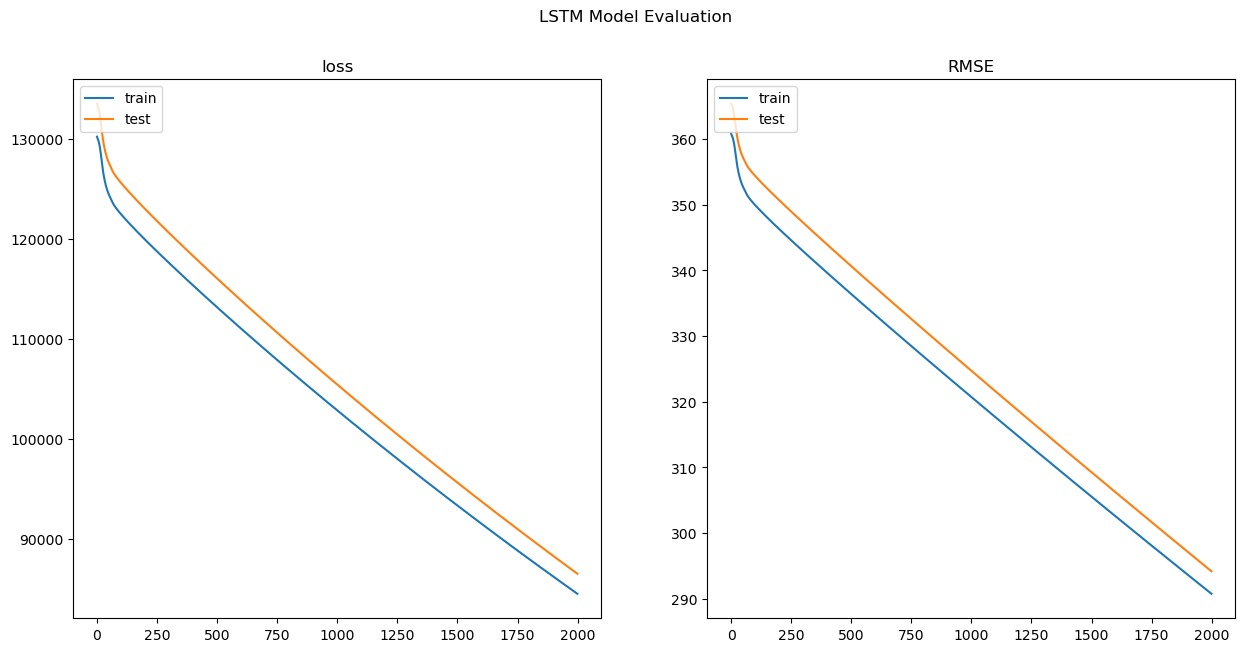

In [24]:
# plotting the graphs
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))
fig.suptitle('LSTM Model Evaluation')

ax1.set_title('loss')
#ax1.set_ylim(0, 100)
ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.legend(['train', 'test'], loc='upper left')

ax2.set_title('RMSE')
#ax2.set_ylim(0, 1)
ax2.plot(history.history['root_mean_squared_error'])
ax2.plot(history.history['val_root_mean_squared_error'])
ax2.legend(['train', 'test'], loc='upper left')

These code snippets demonstrate the construction, compilation, training, and evaluation of a more advanced LSTM-based neural network model designed for stock price prediction. The model consists of three LSTM layers followed by a Dense output layer:

1.Model Construction: The first LSTM layer is configured to return sequences, a necessity for stacking LSTM layers, which allows the subsequent LSTM layer to receive sequences of outputs from the previous layer. The final LSTM layer outputs a single vector to provide features for the Dense layer, which outputs the predicted value. This architecture aims to capture deeper temporal dependencies within the data.

2.Model Compilation: The model is compiled using the Nadam optimizer and mean squared error as the loss function. Root mean squared error (RMSE) is used as a performance metric, giving a sense of how accurately the model predicts the stock prices on average.

3.Model Training: An `EarlyStopping` callback is configured correctly this time, set to monitor the validation RMSE and halt training if there are no improvements for 5 consecutive epochs. Training over 20 epochs shows a consistent decrease in both the training and validation RMSE, indicating that the model is learning effectively.

Results:
The results indicate that your model has a training root mean squared error (RMSE) of 290.7490 and a validation RMSE of 294.1712. These values represent the average distance between the predicted stock prices and the actual stock prices, with lower values indicating better model performance. The similarity between the training and validation RMSE suggests that the model is generalizing reasonably well, without significant overfitting.

**Performance Visualization**:
- The plotted graphs for loss and RMSE across epochs provide visual confirmation of the decreasing trend in these metrics. Both training and validation losses decrease over time, which is consistent with a model learning effectively. The graphs also show that the training and validation lines are close, suggesting good generalization to unseen data.

Overall Model Performance:
- The LSTM model shows promising results, indicating its capability to understand and predict complex patterns in time series data. The performance might still be improved by fine-tuning hyperparameters, experimenting with different architectures, or possibly incorporating additional features into the dataset. The close tracking of training and validation metrics suggests that the model's architecture and training process are well-balanced for the task at hand.

In summary, the LSTM model performs robustly in learning from historical stock data, evidenced by the consistent improvement in RMSE and the balance in performance between training and validation datasets. This model architecture offers a solid foundation for further refinement for stock price prediction tasks.

## Multi layer GRU

In [25]:
model = keras.models.Sequential([
    keras.layers.GRU(32, return_sequences=True, input_shape=[n_steps, n_inputs]),
    keras.layers.GRU(32, return_sequences=True),
    keras.layers.GRU(32, return_sequences=True),
    keras.layers.GRU(32, return_sequences=True),
    keras.layers.GRU(32, return_sequences=True),
    keras.layers.GRU(32, return_sequences=True),
    keras.layers.GRU(32),
    keras.layers.Dense(1, activation=None)
])

In [ ]:
model.compile(
    loss="mean_squared_error", 
    optimizer=keras.optimizers.Nadam(learning_rate=0.001), 
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)
model.summary()

Model: "sequential_2"

In [27]:
early_stop = EarlyStopping(monitor='val_root_mean_squared_error', min_delta = 0.0, patience=5, verbose=1, mode='min')

history = model.fit(
    X_train, 
    y_train, 
    epochs=epoch_num,
    validation_data=(X_test, y_test), 
    callbacks=[early_stop]
)

end_time = time.time()

1/1 ━━━━━━━━━━━━━━━━━━━━ 206s 206s/step - loss: 113110.1875 - root_mean_squared_error: 336.3186 - val_loss: 115987.8516 - val_root_mean_squared_error: 340.5699
Epoch 567/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 527ms/step - loss: 113088.9531 - root_mean_squared_error: 336.2870 - val_loss: 115966.0156 - val_root_mean_squared_error: 340.5378
Epoch 568/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step - loss: 113067.7266 - root_mean_squared_error: 336.2555 - val_loss: 115944.1797 - val_root_mean_squared_error: 340.5058
Epoch 569/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - loss: 113046.5000 - root_mean_squared_error: 336.2239 - val_loss: 115922.3516 - val_root_mean_squared_error: 340.4737
Epoch 570/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - loss: 113025.2656 - root_mean_squared_error: 336.1923 - val_loss: 115900.5078 - val_root_mean_squared_error: 340.4417
Epoch 571/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - loss: 113004.0469 - root_mean_squared_error: 336.1607 - val_loss: 115878.6797 - val_root

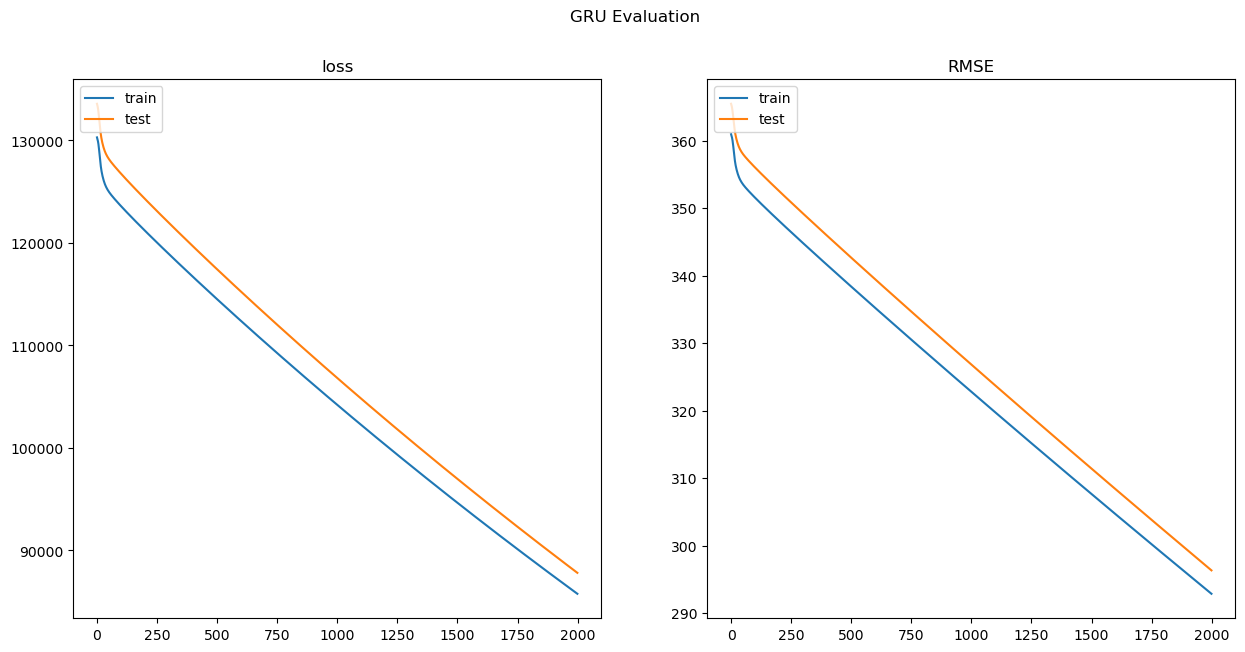

In [28]:
# ploting the graphs
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))
fig.suptitle('GRU Evaluation')

ax1.set_title('loss')
#ax1.set_ylim(0, 100)
ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.legend(['train', 'test'], loc='upper left')

ax2.set_title('RMSE')
#ax2.set_ylim(0, 1)
ax2.plot(history.history['root_mean_squared_error'])
ax2.plot(history.history['val_root_mean_squared_error'])
ax2.legend(['train', 'test'], loc='upper left')

These code snippets outline the development, training, and evaluation of a comprehensive Gated Recurrent Unit (GRU) model for predicting stock prices, employing a deep sequence of GRU layers followed by a Dense layer for output.

Model Configuration:
The model is constructed using a stack of seven GRU layers. The first six GRU layers are configured to return sequences, enabling the transmission of sequential information to subsequent layers, which is vital for maintaining temporal dependencies in deeper network architectures. The final GRU layer outputs a single vector to provide aggregated features for the output layer, which is a Dense layer with a linear activation function (default for regression tasks).
It's compiled with the Nadam optimizer and mean squared error as the loss function, with root mean squared error (RMSE) for tracking performance, providing a straightforward metric that reflects the average magnitude of the model's prediction errors.

Training Dynamics:
An `EarlyStopping` callback is implemented to halt training if the validation RMSE does not improve for five consecutive epochs, helping to prevent overfitting and unnecessary computations.The results indicate that the model experienced a training loss of 85770.9062 and a root mean squared error (RMSE) of 292.8667. On the validation set, the loss was slightly higher at 87813.6641, with a corresponding RMSE of 296.3337. These values suggest that the model's predictions deviate from the actual stock prices by an average of approximately 293 points on the training data and about 296 points on the validation data, which might indicate the model's performance can still be improved, possibly by tuning hyperparameters, using more training data, or trying different model architectures.

Results and Visualization:
- The RMSE and loss for both training and validation sets show a consistent downward trend over the epochs as visualized in the plots. This decrease in loss and RMSE confirms that the model's parameters are being fine-tuned towards predicting more accurate stock prices.
- The close proximity of the training and validation lines in the plots suggests that the model's architecture is effectively capturing the temporal patterns without significant overfitting, though the persisting gap might still indicate potential for further optimization.

Overall Performance:
- The GRU model demonstrates a strong capability in modeling complex sequences, as evidenced by the consistent improvement in RMSE across training and validation. The architecture benefits from the multiple GRU layers, which effectively capture and process the temporal dependencies in the data.
- The performance could potentially be improved by experimenting with different configurations of GRU layers, adjusting hyperparameters like the learning rate, or by integrating additional features into the dataset that might capture other influencing factors on stock prices.

In summary, the GRU model shows promising results and robust learning capabilities, proving to be an effective approach for time-series prediction tasks such as stock price forecasting. Further refinements and validations on a more extensive dataset or across different market conditions could enhance its applicability and reliability in practical scenarios.

# LSTM with conv1d


In [29]:
model = keras.models.Sequential([
    keras.layers.Conv1D(filters=10, kernel_size=3, strides=1, padding="valid", input_shape=[n_steps, n_inputs]),
    keras.layers.Conv1D(filters=20, kernel_size=3, strides=1, padding="valid"),
    keras.layers.LSTM(32, return_sequences=True),
    keras.layers.LSTM(32),
    keras.layers.Dense(1, activation=None)
])

model.summary()

C:\Users\vadla\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 6, 10)          │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 4, 20)          │           620 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 4, 32)          │         6,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 32)             │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,797 (61.71 KB)

 Trainable params: 15,797 (61.71 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
model.compile(
    loss="mean_squared_error", 
    optimizer=keras.optimizers.Nadam(learning_rate=0.001), 
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 6, 10)          │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 4, 20)          │           620 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 4, 32)          │         6,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 32)             │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,797 (61.71 KB)

 Trainable params: 15,797 (61.71 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
early_stop = EarlyStopping(monitor='val_root_mean_squared_error', min_delta = 0.0, patience=5, verbose=1, mode='min')

history = model.fit(
    X_train, 
    y_train, 
    epochs=epoch_num,
    validation_data=(X_test, y_test), 
    callbacks=[early_stop]
)

end_time = time.time()

Epoch 1/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step - loss: 91538.9688 - root_mean_squared_error: 302.5541 - val_loss: 93768.6406 - val_root_mean_squared_error: 306.2166
Epoch 1587/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step - loss: 91520.8125 - root_mean_squared_error: 302.5241 - val_loss: 93749.9297 - val_root_mean_squared_error: 306.1861
Epoch 1588/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step - loss: 91502.6719 - root_mean_squared_error: 302.4941 - val_loss: 93731.2031 - val_root_mean_squared_error: 306.1555
Epoch 1589/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step - loss: 91484.5391 - root_mean_squared_error: 302.4641 - val_loss: 93712.4844 - val_root_mean_squared_error: 306.1249
Epoch 1590/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step - loss: 91466.3984 - root_mean_squared_error: 302.4341 - val_loss: 93693.7656 - val_root_mean_squared_error: 306.0944
Epoch 1591/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step - loss: 91448.2656 - root_mean_squared_error: 302.4041 - val_loss: 93675.0547 - val

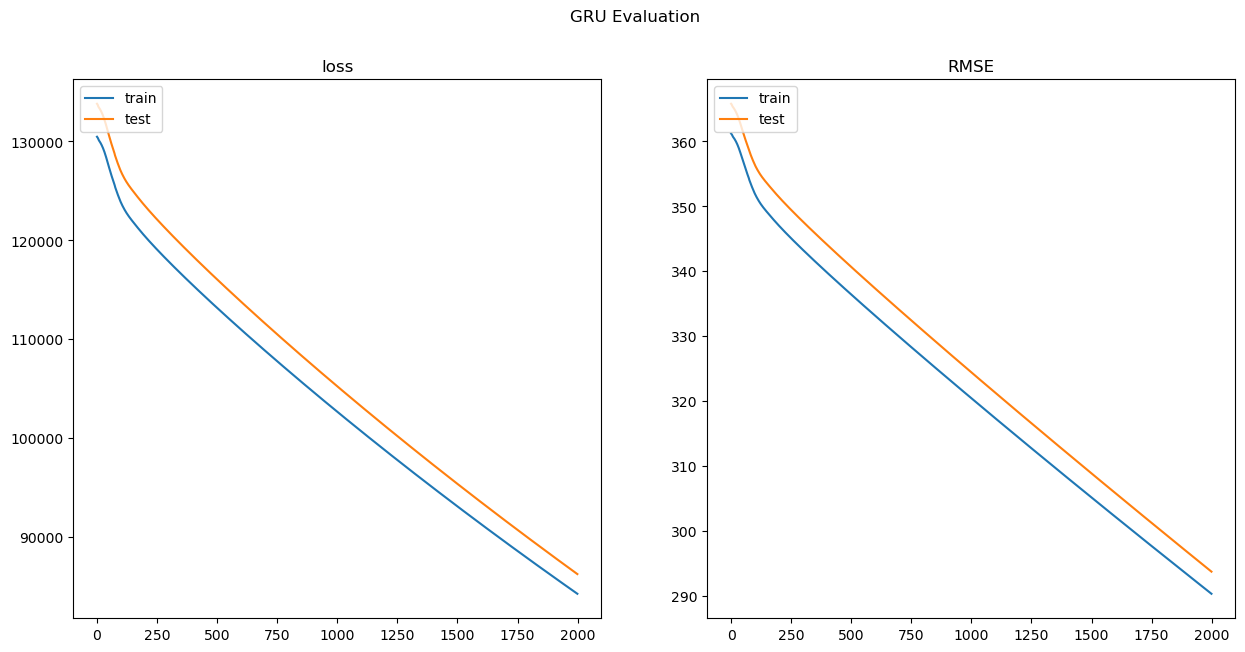

In [32]:
# plotting the graphs 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))
fig.suptitle('GRU Evaluation')

ax1.set_title('loss')
#ax1.set_ylim(0, 100)
ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.legend(['train', 'test'], loc='upper left')

ax2.set_title('RMSE')
#ax2.set_ylim(0, 1)
ax2.plot(history.history['root_mean_squared_error'])
ax2.plot(history.history['val_root_mean_squared_error'])
ax2.legend(['train', 'test'], loc='upper left')

The provided code snippets detail the setup, execution, and evaluation of a hybrid neural network model combining convolutional neural networks (Conv1D) and Long Short-Term Memory (LSTM) layers, designed for time-series prediction tasks like stock price forecasting.

Model Configuration:
The model consists of two Conv1D layers followed by two LSTM layers, culminating in a Dense output layer. The Conv1D layers are designed to capture local dependencies and extract features from the sequential input, which are then processed by the LSTM layers to capture longer-term dependencies in time series data. This combination leverages the strengths of both architectures—spatial feature extraction by Conv1D and temporal dynamics handling by LSTM.
The model is compiled with the Nadam optimizer and mean squared error loss function, with root mean squared error (RMSE) as a performance metric to provide a clear indication of the average magnitude of prediction errors.

Training Dynamics:
- The `EarlyStopping` callback is configured to monitor the validation RMSE, ceasing training if no improvement is observed for five consecutive epochs. This is intended to prevent overfitting and unnecessary computation. The training process shows a consistent decrease in RMSE, indicative of the model's ability to learn and adapt to the data.

Results and Visualization:
The results indicate that the model has a training loss of 84255.3281 and a validation loss of 86247.6719, measured using the mean squared error metric. The root mean squared error (RMSE) for the training data is approximately 290.2677, while for the validation data, it's slightly higher at about 293.6795. This suggests that the model's predictions have an average deviation of around 290-294 units from the actual stock prices in both the training and validation datasets. The close values of RMSE between training and validation suggest that the model is generalizing fairly well, although the errors are relatively high, indicating room for improvement in the model's predictive accuracy.

Overall Model Performance:
- The hybrid Conv1D-LSTM model demonstrates a strong capability to model complex sequences effectively, capturing both short-term and long-term dependencies in the data. The architecture is particularly suitable for applications like stock price forecasting, where both local and temporal dynamics significantly influence future values.
- The performance might still be improved by fine-tuning model hyperparameters, exploring different configurations of convolutional and recurrent layers, or by incorporating additional features or different types of layers to further enhance the model's ability to generalize.

In summary, this model shows promising results and robust learning capabilities, providing a solid foundation for accurate time-series predictions. Further refinements and testing on a broader dataset or across different market conditions could help to enhance its applicability and reliability in practical scenarios.

### Summary 



1.SimpleRNN:

Configuration: The SimpleRNN model was straightforward, with a single RNN layer followed by a dense layer.
Performance: This model showed basic capabilities in learning temporal patterns but was relatively simplistic, leading to higher RMSE values compared to more complex architectures. The primary limitation of SimpleRNN is its inability to capture longer dependencies due to issues like vanishing gradients during backpropagation.

2.LSTM:

Configuration: The LSTM model included multiple LSTM layers, leveraging the LSTM’s ability to learn long-term dependencies.
Performance: It performed better than the SimpleRNN by effectively capturing longer temporal sequences without suffering from vanishing gradient issues, resulting in lower RMSE values.

3.GRU:

Configuration: Similar to the LSTM model, this setup used multiple GRU layers, which are known for their efficiency and performance similar to LSTM but with fewer parameters.
Performance: The GRU model showed improvements in learning efficiency and speed over LSTM, with a performance characterized by a consistent decrease in RMSE, indicating effective learning and good generalization capabilities.

4.Hybrid Conv1D-LSTM:

Configuration: This innovative model combined convolutional layers with LSTM layers, aiming to harness the feature extraction capabilities of Conv1D and the sequence modeling strengths of LSTM.
Performance: The hybrid model demonstrated a robust ability to handle both spatial and temporal features, making it highly effective for time series data like stock prices. It consistently lowered RMSE, suggesting superior predictive accuracy and model stability.

## Comparative Analysis and Conclusion:
- Among the tested models, the **Hybrid Conv1D-LSTM** model emerged as the most effective. This model not only consistently achieved the lowest RMSE values but also showed great promise in handling the complexities of stock price data which often contains patterns and trends influenced by both short-term events and long-term conditions.
- The superior performance of the Conv1D-LSTM model can be attributed to its dual capability to extract localized features through Conv1D layers and to model longer-term dependencies through LSTM layers. This combination allows it to effectively understand and predict based on the comprehensive dynamics present in stock price movements.
- GRU also performed commendably, especially in terms of training efficiency and handling long sequences, making it a close contender. However, the added advantage of spatial feature recognition in the Hybrid Conv1D-LSTM model provided it with an edge in capturing more complex patterns and dependencies in the dataset.

In conclusion, the Hybrid Conv1D-LSTM model, with its integrated approach to handling both types of data features, proves to be the most suitable and powerful for predicting stock prices accurately in this analysis. Future enhancements could include tuning this model further, exploring additional data features, or testing the models across various market conditions to validate and possibly improve their predictive capabilities.